In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer

Matplotlib created a temporary cache directory at C:\Users\Dell\AppData\Local\Temp\matplotlib-lh8jetv7 because the default path (C:\Users\Dell\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
train_data = pd.read_csv('kaggle_data/train-spaceship.csv')
test_data = pd.read_csv('kaggle_data/test-spaceship.csv')

In [3]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_data = train_data.drop('PassengerId', axis=1)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 823.6+ KB


In [6]:
train_data.isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
train_data = train_data.drop('Name', axis=1)

In [8]:
categorical_data = train_data.select_dtypes(include='object')
numerical_data = train_data.select_dtypes(include='number')

In [9]:
for col in train_data.columns:
    print(train_data[col].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

HomePlanet
Earth     54.2%
Europa    25.1%
Mars      20.7%
Name: proportion, dtype: object
CryoSleep
False    64.2%
True     35.8%
Name: proportion, dtype: object
Cabin
G/734/S     0.1%
G/109/P     0.1%
B/201/P     0.1%
G/1368/P    0.1%
G/981/S     0.1%
            ... 
G/556/P     0.0%
E/231/S     0.0%
G/545/S     0.0%
G/543/S     0.0%
F/947/P     0.0%
Name: proportion, Length: 6560, dtype: object
Destination
TRAPPIST-1e      69.5%
55 Cancri e      21.1%
PSO J318.5-22     9.4%
Name: proportion, dtype: object
Age
24.0    3.8%
18.0    3.8%
21.0    3.7%
19.0    3.4%
23.0    3.4%
        ... 
72.0    0.0%
78.0    0.0%
79.0    0.0%
76.0    0.0%
77.0    0.0%
Name: proportion, Length: 80, dtype: object
VIP
False    97.7%
True      2.3%
Name: proportion, dtype: object
RoomService
0.0       65.5%
1.0        1.4%
2.0        0.9%
3.0        0.7%
4.0        0.6%
          ...  
1612.0     0.0%
2598.0     0.0%
632.0      0.0%
378.0      0.0%
745.0      0.0%
Name: proportion, Length: 1273, dtype: o

In [10]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


### Missing Values

In [11]:
for col in train_data.columns:
    if train_data[col].dtype == 'object':
        train_data[col] = train_data[col].fillna(train_data[col].mode()[0])
    else:
        train_data[col] = train_data[col].fillna(train_data[col].mean())

C:\Users\Dell\AppData\Local\Temp\ipykernel_19216\1395387562.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data[col] = train_data[col].fillna(train_data[col].mode()[0])


In [12]:
train_data.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Cabin         8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   bool   
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(3)
memory usage: 636.8+ KB


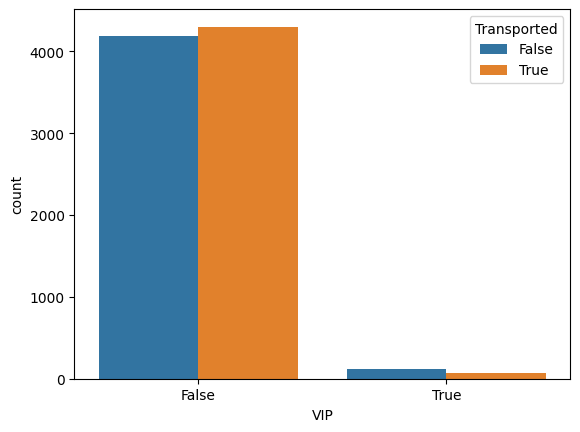

In [14]:
sns.countplot(x='VIP', hue='Transported', data=train_data)
plt.show()

In [15]:
contingency_table = pd.crosstab(train_data['VIP'], train_data['Transported'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print('Independence between VIP and Transported')
print(f'p-value: {p}')

Independence between VIP and Transported
p-value: 0.0006681023600149099


In [16]:
train_data = train_data.drop('VIP', axis=1)

In [17]:
def plot_pie_charts(data):
    for col in data.columns:
        if (data[col].dtype == 'object' and data[col].nunique() < 8) or data[col].nunique() < 8:
            value_counts = data[col].value_counts()
            plt.figure(figsize=(6,6))  # Set the size of the pie chart
            plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
            plt.title(f'{col} Value Counts')
            plt.show()

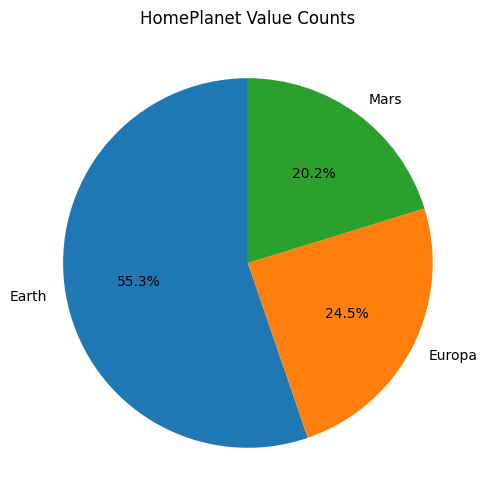

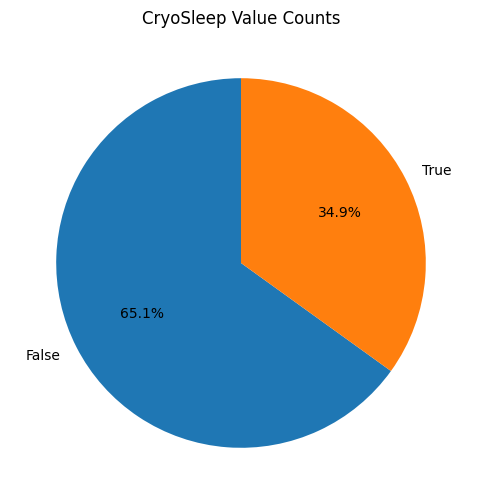

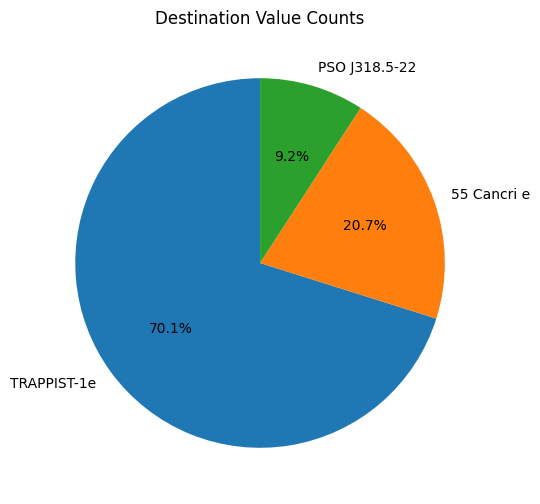

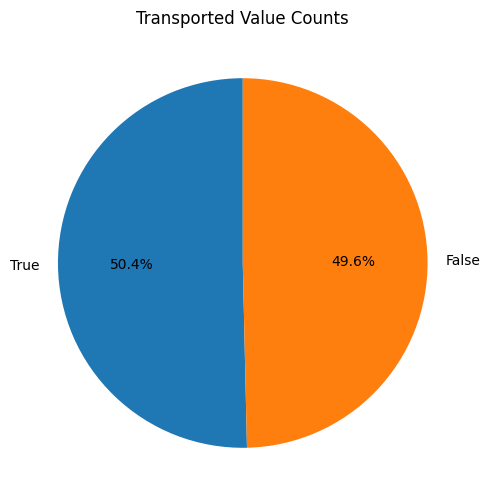

In [18]:
plot_pie_charts(train_data)

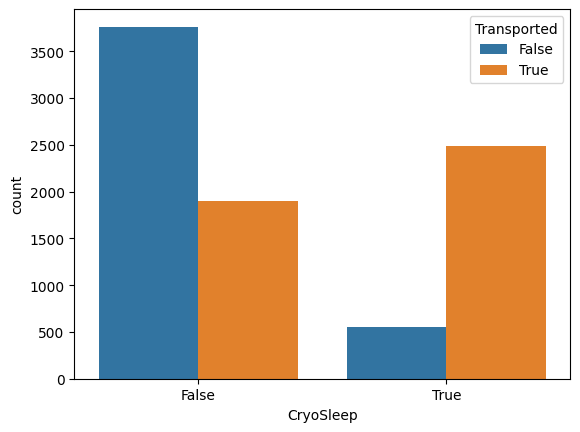

In [19]:
sns.countplot(x='CryoSleep', hue='Transported', data=train_data)
plt.show()

In [20]:
contingency_table = pd.crosstab(train_data['CryoSleep'], train_data['Transported'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print('Independence between CryoSleep and Transported')
print(f'p-value: {p}')

Independence between CryoSleep and Transported
p-value: 0.0


In [21]:
train_data['Cabin_Side'] = train_data['Cabin'].apply(lambda x: x[-1] if pd.notnull(x) else None)

train_data['Cabin_Side'] = train_data['Cabin_Side'].map({'S' : 'Starboard', 'P': 'Port'})

train_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Side
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,False,Port
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,True,Starboard
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,False,Starboard
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,False,Starboard
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,True,Starboard


In [22]:
train_data['Cabin_Deck'] = train_data['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else None)

train_data.sample(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Side,Cabin_Deck
8286,Earth,True,G/1427/S,55 Cancri e,27.0,0.0,0.0,173.729169,0.0,304.854791,True,Starboard,G
3949,Mars,False,D/145/P,TRAPPIST-1e,34.0,992.0,0.0,14.000000,0.0,0.000000,False,Port,D
281,Earth,False,F/68/P,PSO J318.5-22,60.0,7.0,540.0,1.000000,0.0,4.000000,True,Port,F
7537,Europa,True,B/267/P,55 Cancri e,26.0,0.0,0.0,0.000000,0.0,0.000000,True,Port,B
6910,Earth,False,F/1519/P,TRAPPIST-1e,47.0,2916.0,0.0,14.000000,63.0,0.000000,False,Port,F


In [23]:
train_data['Cabin_Deck'].value_counts()

Cabin_Deck
F    2794
G    2758
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

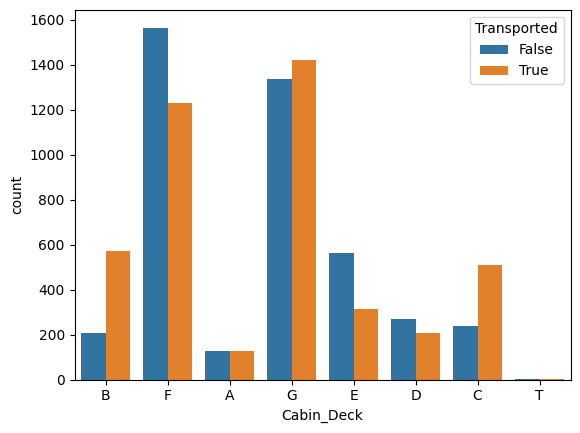

In [24]:
sns.countplot(x='Cabin_Deck', hue='Transported', data=train_data)
plt.show()

In [25]:
train_data = train_data[train_data['Cabin_Deck'] != 'T']

train_data['Cabin_Deck'].value_counts()

Cabin_Deck
F    2794
G    2758
E     876
B     779
C     747
D     478
A     256
Name: count, dtype: int64

In [26]:
contingency_table = pd.crosstab(train_data['Cabin_Deck'], train_data['Transported'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')

Chi-Square Statistic: 390.30714677901176
p-value: 3.388860511016182e-81


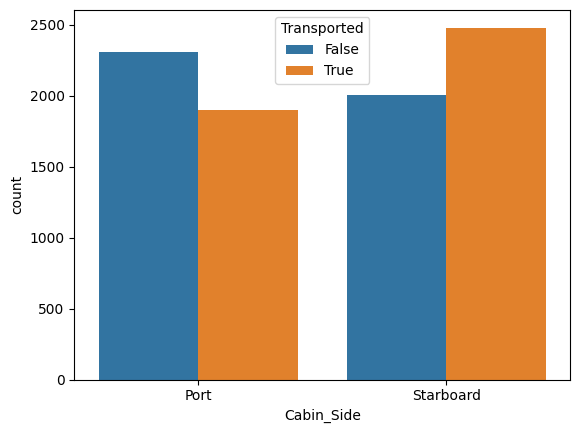

In [27]:
sns.countplot(x='Cabin_Side', hue='Transported', data=train_data)
plt.show()

In [28]:
train_data['Cabin_Number'] = train_data['Cabin'].str.split('/').str[1].astype(int)

train_data.sample(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Side,Cabin_Deck,Cabin_Number
5387,Earth,False,F/1194/P,PSO J318.5-22,19.0,5.0,0.0,0.0,716.0,0.0,False,Port,F,1194
538,Europa,True,C/21/P,TRAPPIST-1e,19.0,0.0,0.0,0.0,0.0,0.0,False,Port,C,21
2864,Mars,False,E/194/P,55 Cancri e,22.0,2229.0,0.0,1349.0,121.0,0.0,True,Port,E,194
1929,Earth,True,G/328/S,PSO J318.5-22,38.0,0.0,0.0,0.0,0.0,0.0,False,Starboard,G,328
4690,Earth,True,G/809/P,TRAPPIST-1e,18.0,0.0,0.0,0.0,0.0,0.0,False,Port,G,809


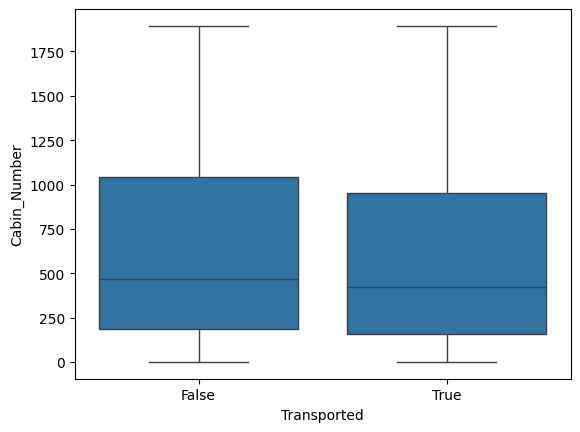

In [29]:
sns.boxplot(x='Transported', y='Cabin_Number', data=train_data)
plt.show()

In [30]:
transported_true = train_data[train_data['Transported'] == True]['Cabin_Number'].dropna()
transported_false = train_data[train_data['Transported'] == False]['Cabin_Number'].dropna()

f_stat, p_value = stats.f_oneway(transported_true, transported_false)
print(f'ANOVA Test F-statistic: {f_stat}, p-value: {p_value}')

ANOVA Test F-statistic: 17.627854557311352, p-value: 2.7130453960847377e-05


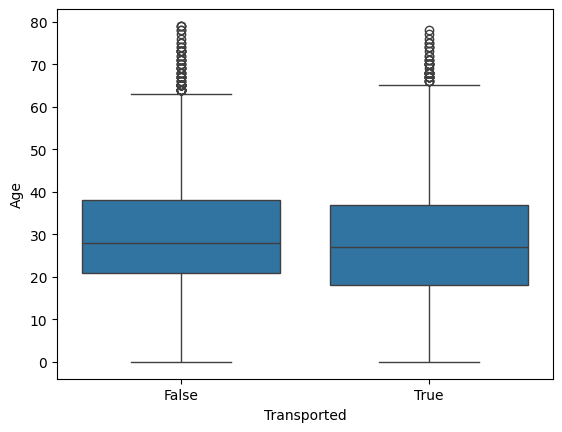

In [31]:
sns.boxplot(x='Transported', y='Age', data=train_data)
plt.show()

In [32]:
transported_true = train_data[train_data['Transported'] == True]['Age'].dropna()
transported_false = train_data[train_data['Transported'] == False]['Age'].dropna()

f_stat, p_value = stats.f_oneway(transported_true, transported_false)
print(f'ANOVA Test F-statistic: {f_stat}, p-value: {p_value}')

ANOVA Test F-statistic: 47.95044448668783, p-value: 4.6819763605985825e-12


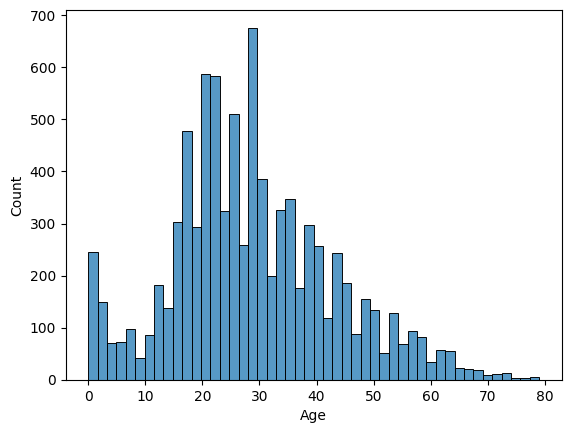

In [33]:
sns.histplot(data=train_data['Age'])
plt.show()

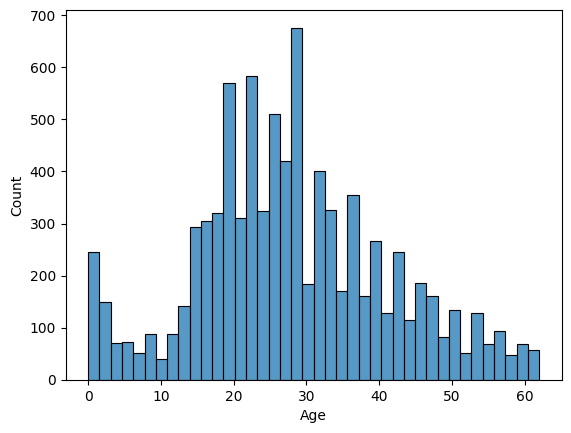

In [34]:
Q1 = train_data['Age'].quantile(0.25)
Q3 = train_data['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median_age = train_data['Age'].median()

train_data['Age'] = np.where(train_data['Age'] > upper_bound, median_age, train_data['Age'])

sns.histplot(data=train_data['Age'])
plt.show()

In [35]:
train_data['TotalExpenses'] = train_data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

In [36]:
train_data.sample(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Side,Cabin_Deck,Cabin_Number,TotalExpenses
4489,Mars,True,F/972/P,TRAPPIST-1e,6.0,0.0,0.0,0.0,0.0,0.0,True,Port,F,972,0.0
1177,Europa,False,A/9/P,TRAPPIST-1e,32.0,8168.0,69.0,11.0,371.0,0.0,False,Port,A,9,8619.0
380,Europa,True,B/18/P,TRAPPIST-1e,59.0,0.0,0.0,0.0,0.0,0.0,True,Port,B,18,0.0
103,Europa,False,G/734/S,TRAPPIST-1e,32.0,0.0,410.0,6.0,3929.0,764.0,False,Starboard,G,734,5109.0
7367,Earth,False,G/1269/P,TRAPPIST-1e,18.0,0.0,0.0,32.0,0.0,673.0,False,Port,G,1269,705.0


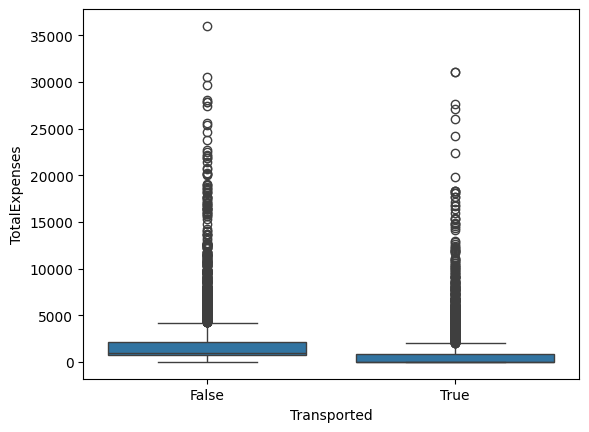

In [37]:
sns.boxplot(x='Transported', y='TotalExpenses', data=train_data)
plt.show()

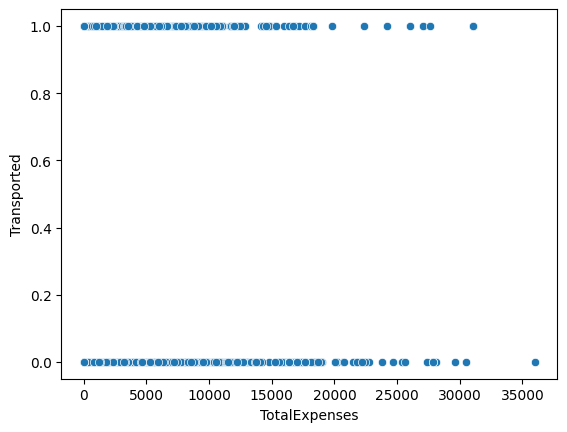

In [38]:
sns.scatterplot(x='TotalExpenses', y='Transported', data=train_data)
plt.show()

In [39]:
train_data['TotalExpenses'].value_counts()

TotalExpenses
0.000000       3247
173.729169       99
304.854791       77
224.687617       74
458.077203       73
               ... 
1061.729169       1
5396.000000       1
4456.000000       1
4003.138778       1
4637.000000       1
Name: count, Length: 2614, dtype: int64

In [40]:
train_data.sample(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Side,Cabin_Deck,Cabin_Number,TotalExpenses
769,Mars,False,F/151/S,TRAPPIST-1e,28.82793,1227.000000,42.0,1.0,0.0,0.0,False,Starboard,F,151,1270.000000
6240,Earth,False,F/1265/S,TRAPPIST-1e,62.00000,94.000000,267.0,2341.0,94.0,0.0,True,Starboard,F,1265,2796.000000
3809,Europa,False,D/131/S,TRAPPIST-1e,27.00000,224.687617,1381.0,0.0,148.0,2181.0,False,Starboard,D,131,3934.687617
481,Earth,True,F/92/S,TRAPPIST-1e,35.00000,0.000000,0.0,0.0,0.0,0.0,True,Starboard,F,92,0.000000
8237,Earth,False,F/1706/S,TRAPPIST-1e,27.00000,1771.000000,0.0,242.0,0.0,37.0,False,Starboard,F,1706,2050.000000


### Handling Outliers

In [59]:
Q1 = train_data['TotalExpenses'].quantile(0.25)
Q3 = train_data['TotalExpenses'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_data['TotalExpenses'] = np.where(train_data['TotalExpenses'] > upper_bound, train_data['TotalExpenses'].median(), train_data['TotalExpenses'])
train_data['TotalExpenses'] = np.where(train_data['TotalExpenses'] < lower_bound, train_data['TotalExpenses'].median(), train_data['TotalExpenses'])

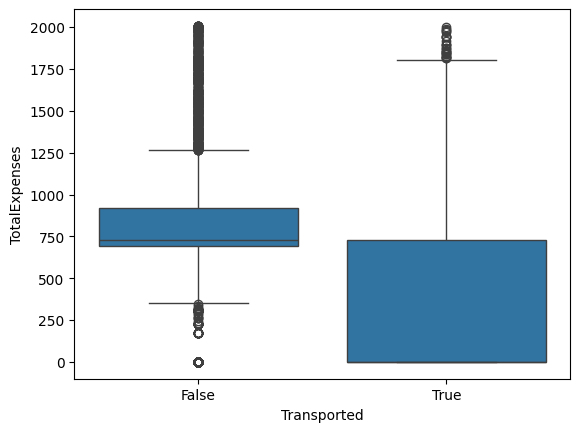

In [60]:
sns.boxplot(x='Transported', y='TotalExpenses', data=train_data)
plt.show()

In [62]:
train_data['CryoSleep'] = train_data['CryoSleep'].astype(int)
train_data['Transported'] = train_data['Transported'].astype(int)
train_data = train_data.drop('Cabin', axis=1)

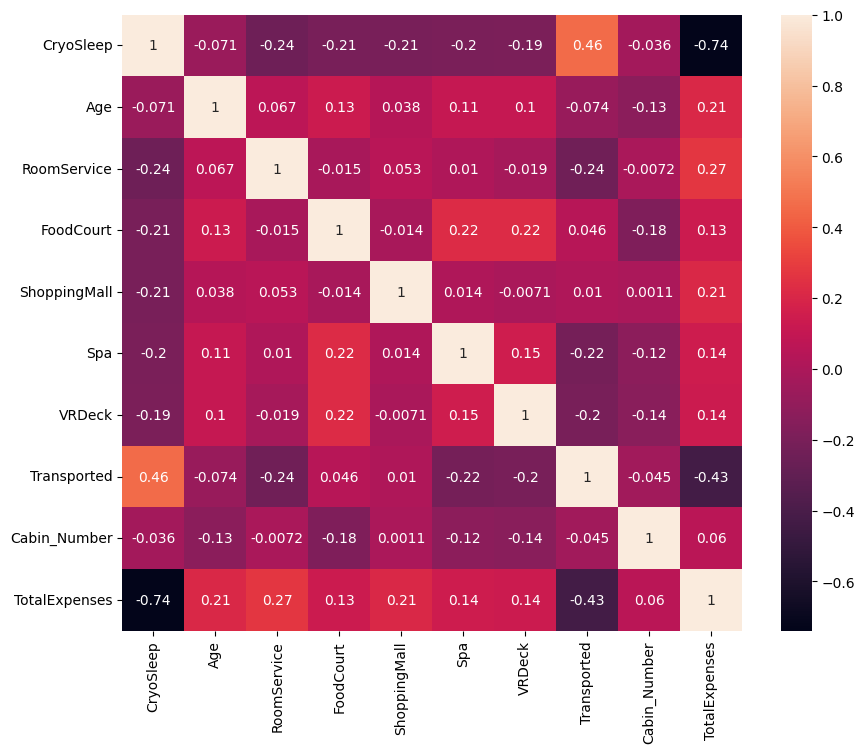

In [69]:
numerical_data = train_data.select_dtypes(include='number')
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True)
plt.show()

### Data Encoding

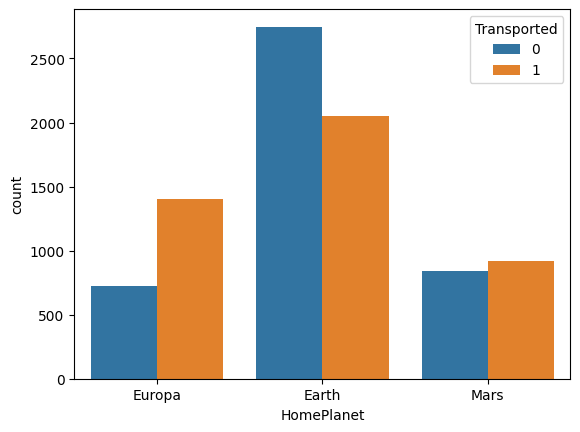

In [70]:
sns.countplot(x='HomePlanet', hue='Transported', data=train_data)
plt.show()

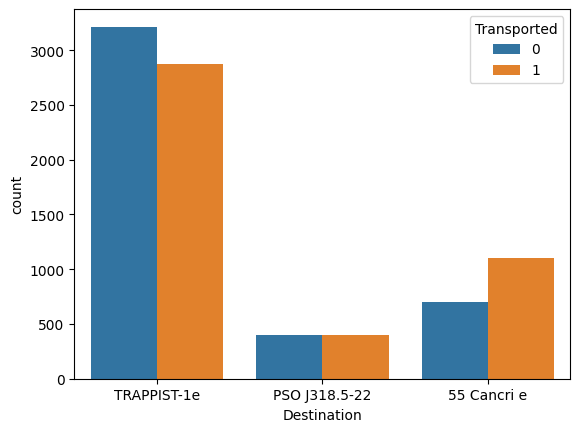

In [71]:
sns.countplot(x='Destination', hue='Transported', data=train_data)
plt.show()

In [72]:
categorical_data = train_data.select_dtypes(include='object')

for col in categorical_data.columns:
    train_data = pd.get_dummies(train_data, columns=[col])

In [73]:
train_data.sample(5)

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Number,TotalExpenses,...,Destination_TRAPPIST-1e,Cabin_Side_Port,Cabin_Side_Starboard,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G
4887,0,41.0,717.0,641.0,2.0,1559.0,4828.0,0,163,726.5,...,False,True,False,False,False,True,False,False,False,False
7704,1,34.0,0.0,0.0,0.0,0.0,0.0,1,1696,0.0,...,True,True,False,False,False,False,False,False,True,False
2247,1,18.0,0.0,0.0,0.0,0.0,0.0,1,465,0.0,...,True,False,True,False,False,False,False,False,True,False
1538,0,37.0,0.0,27.0,11.0,732.0,5.0,0,309,775.0,...,True,False,True,False,False,False,False,False,True,False
1590,0,26.0,714.0,450.0,208.0,0.0,44.0,0,334,1416.0,...,True,True,False,False,False,False,False,False,True,False


In [75]:
bool_cols = train_data.select_dtypes('bool').columns
for col in bool_cols:
    train_data[col] = train_data[col].astype(int)

In [76]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8688 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8688 non-null   int32  
 1   Age                        8688 non-null   float64
 2   RoomService                8688 non-null   float64
 3   FoodCourt                  8688 non-null   float64
 4   ShoppingMall               8688 non-null   float64
 5   Spa                        8688 non-null   float64
 6   VRDeck                     8688 non-null   float64
 7   Transported                8688 non-null   int32  
 8   Cabin_Number               8688 non-null   int32  
 9   TotalExpenses              8688 non-null   float64
 10  HomePlanet_Earth           8688 non-null   int32  
 11  HomePlanet_Europa          8688 non-null   int32  
 12  HomePlanet_Mars            8688 non-null   int32  
 13  Destination_55 Cancri e    8688 non-null   int32  
 1

In [79]:
train_data = train_data.drop(['Destination_PSO J318.5-22', 'Cabin_Side_Port', 'Cabin_Deck_A', 'HomePlanet_Mars'], axis=1)

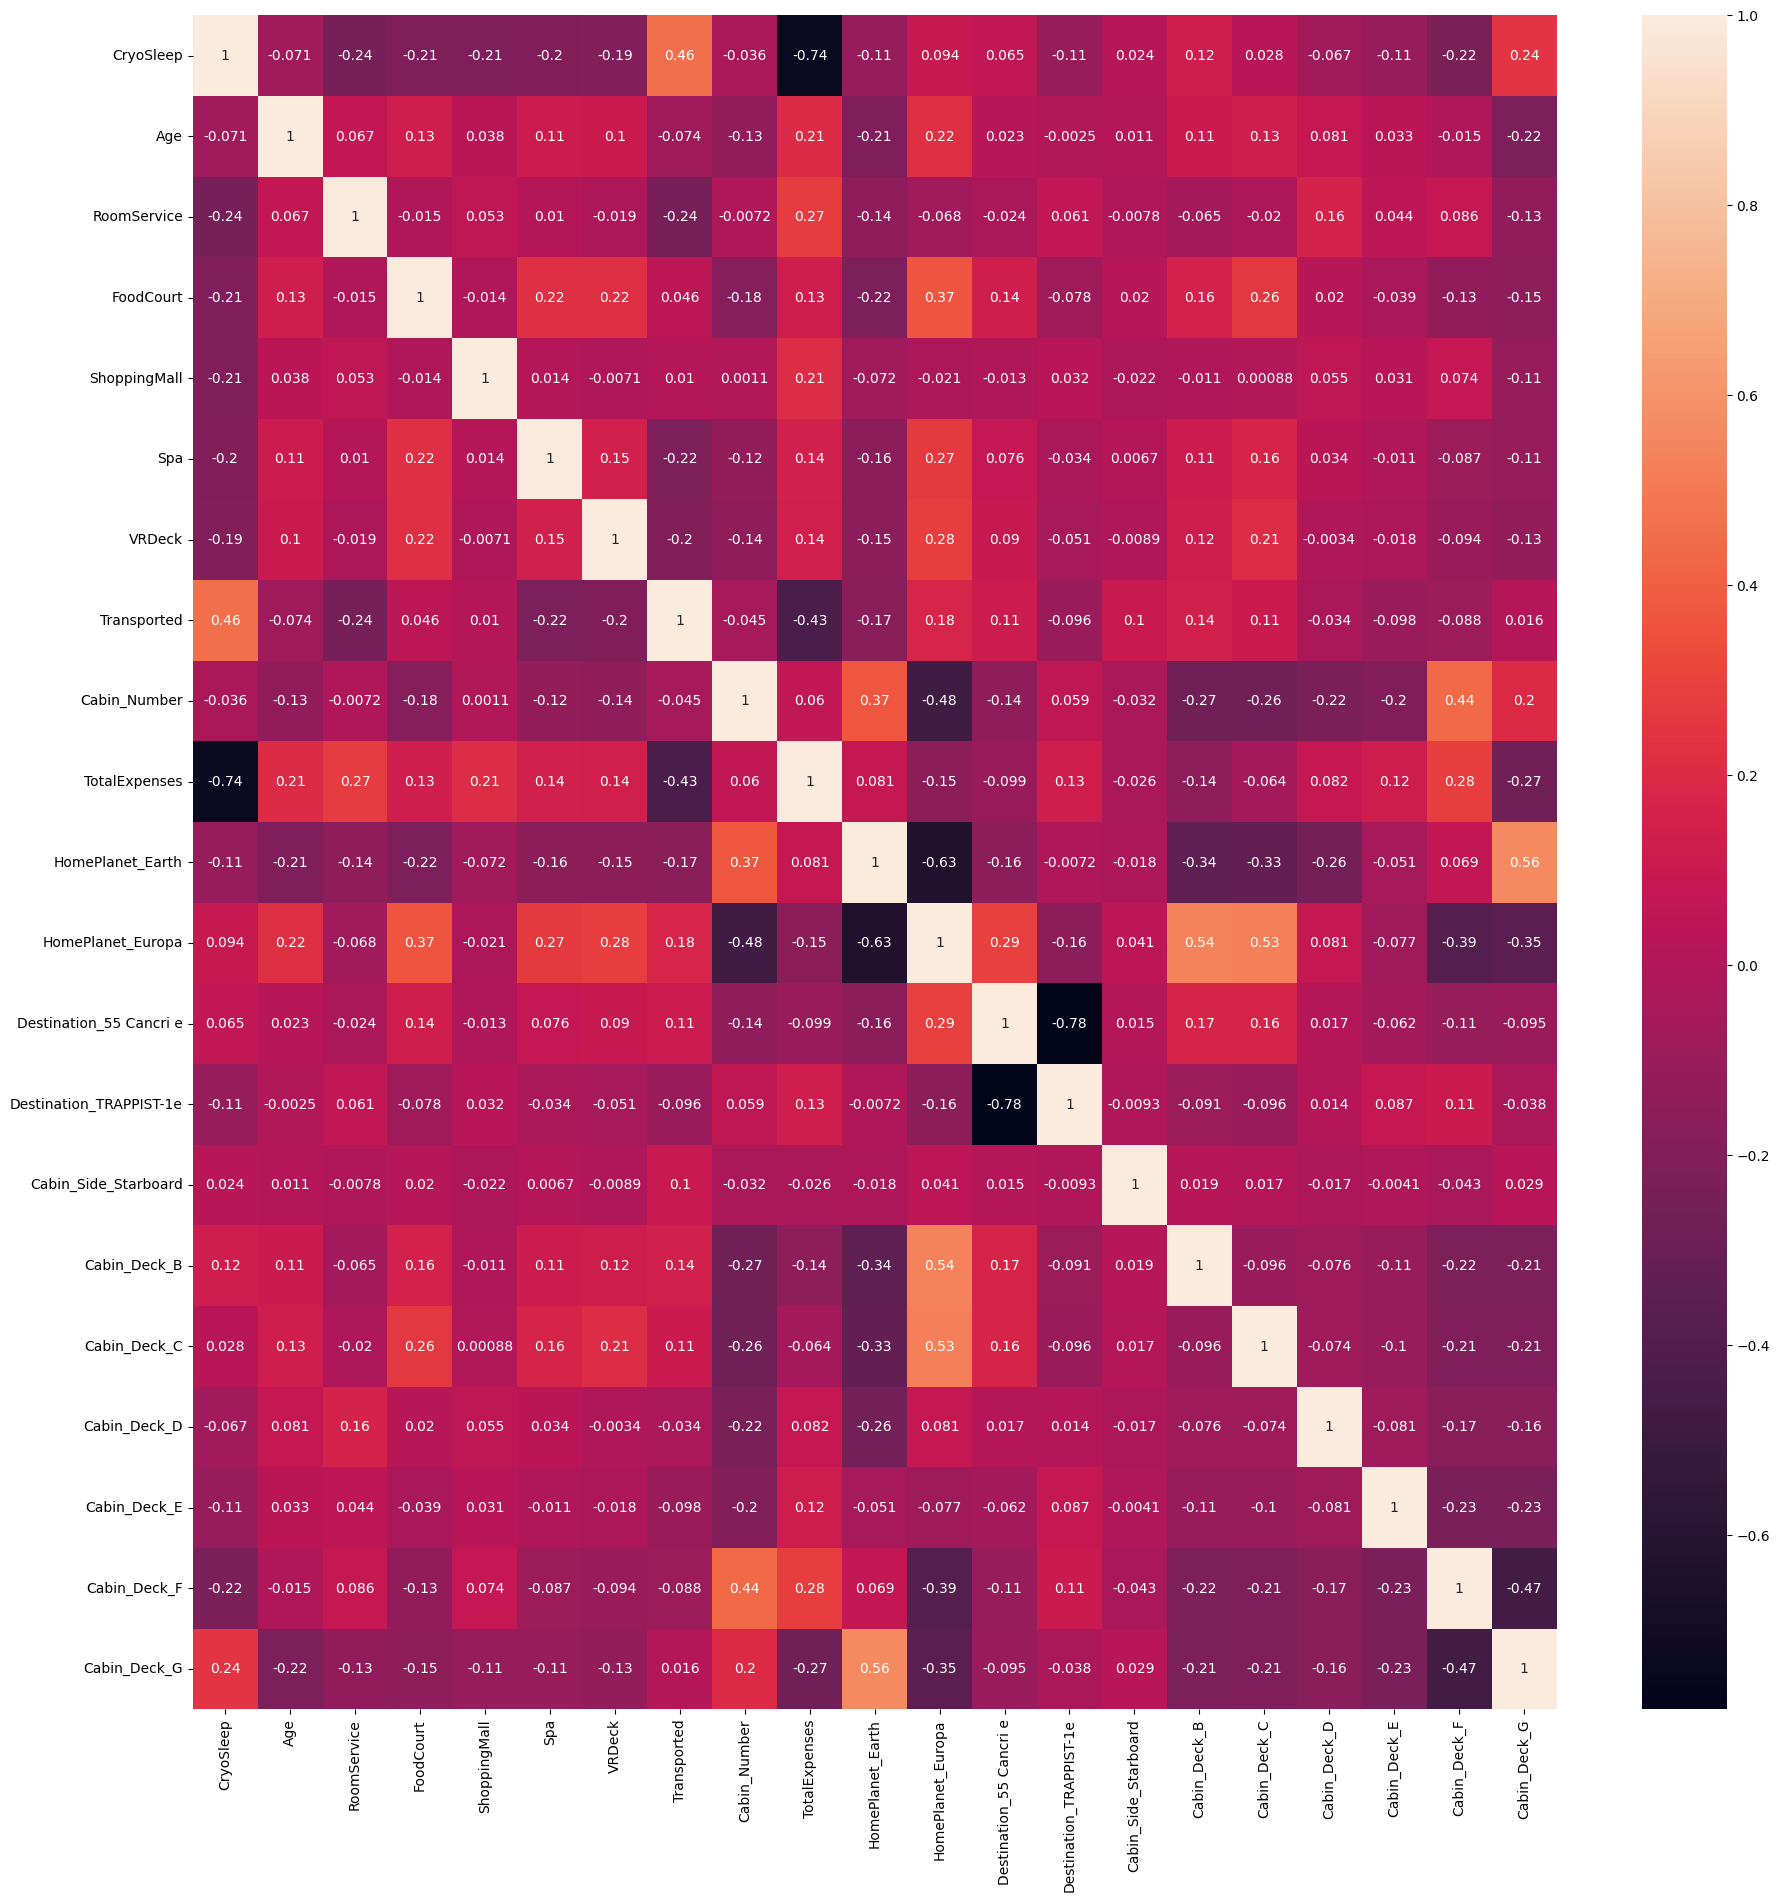

In [81]:
plt.figure(figsize=(22, 22))
sns.heatmap(train_data.corr(), annot=True)
plt.show()

In [82]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8688 entries, 0 to 8692
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CryoSleep                8688 non-null   int32  
 1   Age                      8688 non-null   float64
 2   RoomService              8688 non-null   float64
 3   FoodCourt                8688 non-null   float64
 4   ShoppingMall             8688 non-null   float64
 5   Spa                      8688 non-null   float64
 6   VRDeck                   8688 non-null   float64
 7   Transported              8688 non-null   int32  
 8   Cabin_Number             8688 non-null   int32  
 9   TotalExpenses            8688 non-null   float64
 10  HomePlanet_Earth         8688 non-null   int32  
 11  HomePlanet_Europa        8688 non-null   int32  
 12  Destination_55 Cancri e  8688 non-null   int32  
 13  Destination_TRAPPIST-1e  8688 non-null   int32  
 14  Cabin_Side_Starboard     8688

In [83]:
train_data.duplicated().sum()

19

In [85]:
train_data.drop_duplicates(inplace=True)
train_data.shape

(8669, 21)

In [141]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [142]:
passengerId = test_data['PassengerId']
test_data = test_data.drop('PassengerId', axis=1)

In [165]:
def clean_data(data):
    data = data.drop('Name', axis=1)
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = data[col].fillna(data[col].mode()[0])
        else:
            data[col] = data[col].fillna(data[col].mean())

    data = data.drop('VIP', axis=1)

    data['Cabin_Side'] = data['Cabin'].apply(lambda x: x[-1] if pd.notnull(x) else None)

    data['Cabin_Side'] = data['Cabin_Side'].map({'S' : 'Starboard', 'P': 'Port'})
    
    data['Cabin_Deck'] = data['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else None)

    data['Cabin_Number'] = data['Cabin'].str.split('/').str[1].astype(int)

    Q1 = data['Age'].quantile(0.25)
    Q3 = data['Age'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_age = data['Age'].median()

    data['Age'] = np.where(data['Age'] > upper_bound, median_age, data['Age'])

    data['TotalExpenses'] = data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

    Q1 = data['TotalExpenses'].quantile(0.25)
    Q3 = data['TotalExpenses'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data['TotalExpenses'] = np.where(data['TotalExpenses'] > upper_bound, data['TotalExpenses'].median(), data['TotalExpenses'])
    data['TotalExpenses'] = np.where(data['TotalExpenses'] < lower_bound, data['TotalExpenses'].median(), data['TotalExpenses'])

    data['CryoSleep'] = data['CryoSleep'].astype(int)
    data = data.drop('Cabin', axis=1)

    categorical_data = data.select_dtypes(include='object')

    for col in categorical_data.columns:
        data = pd.get_dummies(data, columns=[col])


    bool_cols = data.select_dtypes('bool').columns
    for col in bool_cols:
        data[col] = data[col].astype(int)

    data = data.drop(['Destination_PSO J318.5-22', 'Cabin_Side_Port', 'Cabin_Deck_A', 'HomePlanet_Mars', 'Cabin_Deck_T'], axis=1)

    return data

In [166]:
test = clean_data(test_data)

C:\Users\Dell\AppData\Local\Temp\ipykernel_19216\4217468438.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].fillna(data[col].mode()[0])


In [105]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [88]:
x = train_data.drop('Transported', axis=1)
y = train_data['Transported']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8)

In [90]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [167]:
test = scaler.transform(test)

#### Logisitic Regression

In [106]:
lg_model = LogisticRegression()

lg_model.fit(x_train, y_train)

LogisticRegression()

In [107]:
lg_model.score(x_test, y_test)

0.8056516724336793

In [109]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [110]:
dt_model.score(x_test, y_test)

0.7502883506343714

In [111]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [112]:
rf_model.score(x_test, y_test)

0.8108419838523645

In [113]:
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train)

GradientBoostingClassifier()

In [114]:
gb_model.score(x_test, y_test)

0.8160322952710496

In [115]:
ada_model = AdaBoostClassifier()
ada_model.fit(x_train, y_train)

c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [116]:
ada_model.score(x_test, y_test)

0.7958477508650519

In [117]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [118]:
xgb_model.score(x_test, y_test)

0.8137254901960784

In [119]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [120]:
svc.score(x_test, y_test)

0.8073817762399077

#### Choosing Gradient Boost

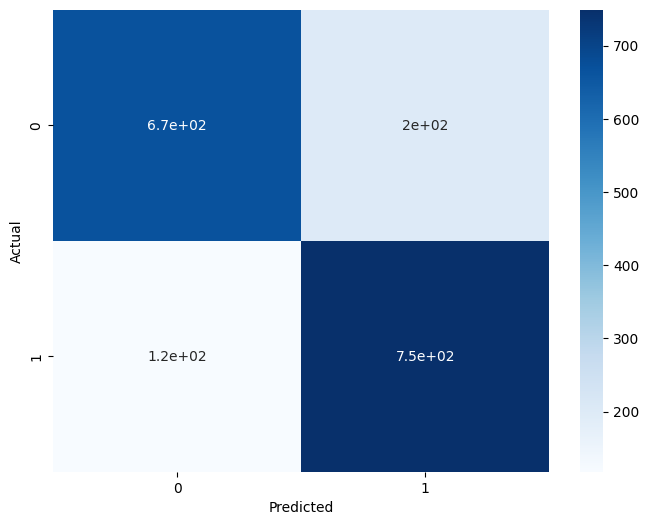

In [168]:
from sklearn.metrics import confusion_matrix

gb_pred = gb_model.predict(x_test)

cm = confusion_matrix(y_test, gb_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [169]:
predictions = gb_model.predict(test)

In [170]:
passengerId

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [171]:
predictions = predictions.astype(bool)
predictions

array([ True, False,  True, ...,  True,  True,  True])

In [172]:
submission = pd.DataFrame({
    'PassengerId': passengerId,
    'Transported': predictions
})

submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [173]:
submission.to_csv('spaceship_submission.csv', index=False)